<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/%20%20hodgkin_huxley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Hodgkin-Huxley model is a foundational biophysical model that explains how action potentials in neurons are initiated and propagated.


The main idea is that the neuron's cell membrane acts like a capacitor and has ion channels that behave like resistors through which different ions (e.g., Na⁺, K⁺, Cl⁻) flow. These movements create electrical currents that can be mathematically modeled.


## Overview

* Hodgkin and Huxley (1952) experimented on the **squid giant axon**.
* They identified three types of ion currents:

  * Sodium (Na⁺)
  * Potassium (K⁺)
  * A leak current (mostly Cl⁻ ions)

* Sodium and potassium have **voltage-dependent ion channels** (they open/close depending on membrane voltage).
* The **leak current** accounts for other ions that are always slightly passing through.


## The Electrical Analog of the Cell Membrane

  * **C** = membrane capacitance (stores charge)
  * **R** = resistance (ion channels)
  * **K**, **Na** = specific pathways (channels) for potassium and sodium ions

The idea is that **membrane potential behaves like a circuit**, where current can:

1. Charge the membrane (capacitor),
2. Flow through ion channels (resistors).


# Definition of the Model

* The membrane **separates intracellular from extracellular fluid** and behaves like a capacitor.
* When you inject a current $I(t)$:

  * Some goes to **charge the membrane** $I_{\text{cap}}(t)$
  * Some **leaks through ion channels** $I_k(t)$

So the total current:

$$
I(t) = I_{\text{cap}}(t) + \sum_k I_k(t)
$$

This equation is key. It’s **conservation of charge**: all current either goes into charging the membrane or leaks through ion channels.

where,

* $I(t)$: Total current applied
* $I_{\text{cap}}(t)$: Capacitive current = current used to change membrane voltage
* $I_k(t)$: Ionic currents through channels (e.g., sodium, potassium, leak)


---

# Ion Currents and Gating Variables

## Membrane Capacitor Equation

$$
C \frac{du}{dt} = - \sum_k I_k(t) + I(t)
$$

- $C$: Membrane capacitance  
- $u(t)$: Membrane potential (voltage across the membrane)  
- $I_k(t)$: Ionic current through each channel (sodium, potassium, leak)  
- $I(t)$: Injected (external) current  

### Interpretation:

This is just **Kirchhoff’s current law** applied to the membrane:

- The **change in membrane voltage** depends on **total incoming current** minus the **sum of ion channel currents**.
- Capacitor voltage changes according to net current flow.

## Total Ionic Current

$$
\sum_k I_k(t) = g_{\text{Na}} m^3 h (u - E_{\text{Na}}) + g_{\text{K}} n^4 (u - E_{\text{K}}) + g_l (u - E_l)
$$

Each term is in the form $g_{\text{ion}}(u - E_{\text{ion}})$, i.e., **conductance × driving force**:

- $g_{\text{Na}}$: Max conductance for sodium  
- $m^3 h$: Gating variables controlling how much Na⁺ can pass  
- $E_{\text{Na}}$: Reversal potential for Na⁺ (the voltage at which no net flow occurs)  
- $g_{\text{K}}$, $n^4$, $E_{\text{K}}$: Analogous terms for potassium  
- $g_l (u - E_l)$: Leak current (simple ohmic channel)

These three terms together give the **total ion current** out of the cell.

## Gating Variables

$$
\begin{aligned}
\frac{dm}{dt} &= \alpha_m(u)(1 - m) - \beta_m(u)m \\
\frac{dh}{dt} &= \alpha_h(u)(1 - h) - \beta_h(u)h \\
\frac{dn}{dt} &= \alpha_n(u)(1 - n) - \beta_n(u)n
\end{aligned}
$$

Each gating variable ($m$, $h$, $n$) is like a **probability** that a subunit of an ion channel is open.

- $\alpha$: Opening rate (depends on voltage $u$)  
- $\beta$: Closing rate (also depends on voltage)

They describe **how quickly and likely** the channels open or close over time.

## 🔍 Summary of Roles:

| Variable | Meaning               | Affects           |
|----------|-----------------------|-------------------|
| $m$      | Na⁺ activation gate   | Na⁺ conductance ↑ |
| $h$      | Na⁺ inactivation gate | Na⁺ conductance ↓ |
| $n$      | K⁺ activation gate    | K⁺ conductance ↑  |

> These combine nonlinearly (e.g., $m^3 h$, $n^4$) to reflect the real biophysics.



---

# Gating Variable Parameters

## Key Parameters

These are the constants used in the Hodgkin-Huxley equations.

## Reversal Potentials & Max Conductances

| Ion Channel | $E_x$ (mV) | $g_x$ (mS/cm²) |
| ----------- | ---------- | -------------- |
| Na          | +115       | 120            |
| K           | -12        | 36             |
| Leak (L)    | +10.6      | 0.3            |

- $E_x$: **Reversal potential** — the voltage at which there is no net current for ion $x$
- $g_x$: **Maximum conductance** for ion channel $x$

> These are key to calculating the ionic current:

$$
I_x = g_x \cdot \text{(gating variables)} \cdot (u - E_x)
$$

## Rate Functions $\alpha_x(u)$ and $\beta_x(u)$

These define how fast the gates open and close, depending on membrane voltage $u$.

| Variable $x$         | $\alpha_x(u)$                              | $\beta_x(u)$                   |
| -------------------- | ------------------------------------------ | ------------------------------ |
| n (K⁺ activation)    | $\dfrac{0.1(1 - 0.1u)}{\exp(1 - 0.1u) - 1}$ | $0.125 \exp(-u/80)$            |
| m (Na⁺ activation)   | $\dfrac{2.5 - 0.1u}{\exp(2.5 - 0.1u) - 1}$  | $4 \exp(-u/18)$                |
| h (Na⁺ inactivation) | $0.07 \exp(-u/20)$                         | $\dfrac{1}{\exp(3 - 0.1u) + 1}$ |

These are **empirically derived** voltage-dependent transition rates for each gate.

## Graphs

Shows two important functions for each gating variable ($m$, $h$, $n$):

#### (A) $x_0(u)$: Equilibrium value  
The steady-state value the gate variable $x$ would reach if the membrane potential were held constant.

- Think of it as: "What fraction of gates are open at a given voltage?"

#### (B) $\tau_x(u)$: Time constant  
Describes how fast the variable $x$ approaches its equilibrium $x_0(u)$.

- Smaller $\tau_x(u)$ → faster response to changes in voltage



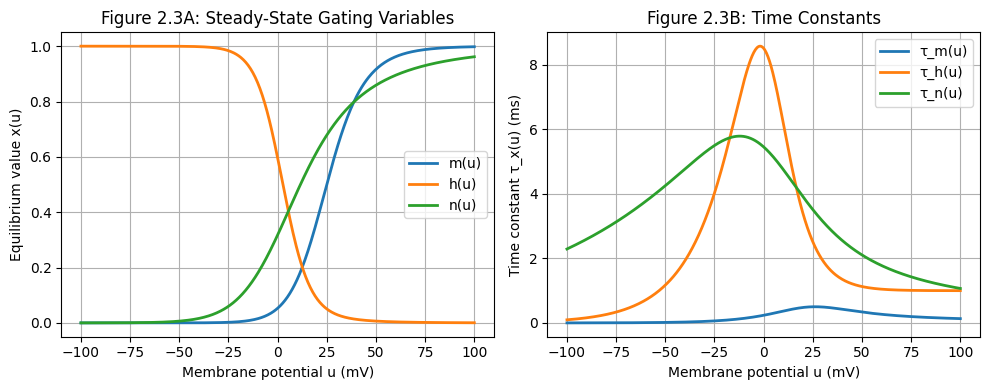

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Voltage range in mV
u = np.linspace(-100, 100, 500)

# Alpha and Beta functions from Table 2.1
def alpha_m(u):
    return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)

def beta_m(u):
    return 4 * np.exp(-u / 18)

def alpha_h(u):
    return 0.07 * np.exp(-u / 20)

def beta_h(u):
    return 1 / (np.exp(3 - 0.1 * u) + 1)

def alpha_n(u):
    return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u) - 1)

def beta_n(u):
    return 0.125 * np.exp(-u / 80)

# Compute steady-state values x∞(u)
m_inf = alpha_m(u) / (alpha_m(u) + beta_m(u))
h_inf = alpha_h(u) / (alpha_h(u) + beta_h(u))
n_inf = alpha_n(u) / (alpha_n(u) + beta_n(u))

# Compute time constants τ_x(u)
tau_m = 1 / (alpha_m(u) + beta_m(u))
tau_h = 1 / (alpha_h(u) + beta_h(u))
tau_n = 1 / (alpha_n(u) + beta_n(u))

# Plotting x∞(u)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(u, m_inf, label='m(u)', linewidth=2)
plt.plot(u, h_inf, label='h(u)', linewidth=2)
plt.plot(u, n_inf, label='n(u)', linewidth=2)
plt.xlabel('Membrane potential u (mV)')
plt.ylabel('Equilibrium value x(u)')
plt.title('Figure 2.3A: Steady-State Gating Variables')
plt.legend()
plt.grid(True)

# Plotting τ_x(u)
plt.subplot(1, 2, 2)
plt.plot(u, tau_m, label='τ_m(u)', linewidth=2)
plt.plot(u, tau_h, label='τ_h(u)', linewidth=2)
plt.plot(u, tau_n, label='τ_n(u)', linewidth=2)
plt.xlabel('Membrane potential u (mV)')
plt.ylabel('Time constant τ_x(u) (ms)')
plt.title('Figure 2.3B: Time Constants')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Reformulated Gating Dynamics

$$
\dot{x} = -\frac{1}{\tau_x(u)} (x - x_0(u))
$$

This is the standard form of a **first-order linear differential equation**, like a **low-pass filter**:

- $x$: Current state of the gating variable  
- $x_0(u)$: Steady-state value at voltage $u$  
- $\tau_x(u)$: Time constant, controlling how quickly $x$ relaxes to $x_0(u)$

## Interpretation

At any fixed membrane potential $u$, the gating variable $x$ will:

- **Approach its steady-state value** $x_0(u)$  
- **With a time constant** $\tau_x(u)$

> This formulation makes the system easier to simulate and understand numerically.



---

# Dynamics of the Hodgkin-Huxley Model

This section explains how the system responds to:

* **Pulse input**
* **Constant input**
* **Step input**
* **Time-dependent input**

The idea is to give you **intuition** for how the model behaves under biologically relevant conditions.


## Spike Generation**

* From **Figure 2.3A** (previous page), it’s stated that:

  * $m_0$ and $n_0$ **increase** with membrane voltage $u$
  * $h_0$ **decreases** with $u$

## Interpretation:

1. **If a current pulse increases the voltage**, more **Na⁺ channels open** (since $m$ rises).
2. This lets in **positive Na⁺ ions**, which **further depolarizes** the membrane.
3. **Positive feedback loop**: More Na⁺ entry → higher voltage → even more Na⁺ entry.
4. If strong enough → **action potential (spike)** is generated.

## But:

* The **$h$** gate (inactivation) acts slowly, **shutting off Na⁺** after a delay.
* The **$n$** gate lets **K⁺ out**, restoring the resting potential.
* This sequence causes the classic **spike + undershoot** behavior of action potentials.
* Spike amplitude is \~100 mV.

## Result:

* If the **current pulse is too small**, voltage decays back — no spike.
* **All-or-nothing threshold behavior**.

---

## Mean Firing Rates and Gain Function**

Now we explore **what happens under constant input**:

* Assume a **step current**:

  $$
  I(t) = I_0 \quad \text{for } t > 0
  $$
* If $I_0 > I_{\theta} \approx 6 \, \mu\text{A/cm}^2$, the neuron **fires regularly**.

### Outcome:

* You get **repetitive spiking** at a **constant frequency**.
* Define **firing rate**:

  $$
  \nu = \frac{1}{T}
  $$

  where $T$ is the interspike interval.

This forms the **gain function**, which tells you how firing rate depends on the input strength $I_0$.

## Example: Step Current Input**

They now define a more general **step function** input:

$$
I(t) = I_1 + \Delta I \cdot \Theta(t)
$$

* $\Theta(t)$: Heaviside step function (0 for $t < 0$, 1 for $t \ge 0$)
* At $t = 0$, the input **jumps from $I_1$ to $I_1 + \Delta I$**

> This helps test **transient behavior** — like how the neuron reacts to sudden increases in stimulation.

## Summary of Key Takeaways:

| Type of Input      | Response Behavior                                |
| ------------------ | ------------------------------------------------ |
| **Pulse**          | May trigger spike if above threshold             |
| **Constant**       | Fires regularly if current > threshold           |
| **Step**           | Triggers transient response or sustained spiking |
| **Time-dependent** | Rich dynamics, e.g., oscillations or bursts      |

---

Let me know when you're ready for the next page, or I can show you a small simulation to visualize one of these input-response types.
